In [ ]:
import keras
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import string
import re
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Scarica le stopwords e i tokenizer se non sono già presenti
nltk.download('stopwords')
nltk.download('punkt')

# Lista delle stopwords in lingua inglese
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove comments between square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove linebreak characters
    text = re.sub(r'\n', ' ', text)

    # Tokenize words
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum()]

    # Rejoin tokens into clean text
    clean_text = ' '.join(tokens)
    return clean_text

# Applica la funzione preprocess_text alla colonna 'lyrics' del DataFrame df
df['clean_lyrics'] = df['lyrics'].apply(preprocess_text)

# Numero massimo di feature da considerare
max_features = 10000

# Creazione del Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['clean_lyrics'])

# Convertire il testo preprocessato in sequenze di numeri interi
sequences = tokenizer.texts_to_sequences(df['clean_lyrics'])

# Lunghezza massima delle sequenze (puoi regolarla a tuo piacimento)
maxlen = 200

# Padding delle sequenze per avere lunghezza uniforme
data = pad_sequences(sequences, maxlen=maxlen)

labels = df['sentiment'].values  # Utilizza la colonna 'sentiment' come etichetta

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
import numpy as np

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(data, labels, epochs=4, batch_size=16, validation_split=0.05)

Epoch 1/4
1642/1642 [==============================] - 376s 227ms/step - loss: 0.5383 - accuracy: 0.7694 - val_loss: 0.4382 - val_accuracy: 0.8596
Epoch 2/4
1642/1642 [==============================] - 369s 224ms/step - loss: 0.5002 - accuracy: 0.7755 - val_loss: 0.4765 - val_accuracy: 0.8408
Epoch 3/4
1642/1642 [==============================] - 367s 224ms/step - loss: 0.4392 - accuracy: 0.8037 - val_loss: 0.4915 - val_accuracy: 0.8054
Epoch 4/4
1642/1642 [==============================] - 363s 221ms/step - loss: 0.3682 - accuracy: 0.8383 - val_loss: 0.5548 - val_accuracy: 0.7887


'\n# Define the number of folds\nn_folds = 4\n\n# Define the K-fold cross-validator\nkfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)\n\n# Define the LSTM model\nmodel = Sequential()\nmodel.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))\nmodel.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(units=1, activation=\'sigmoid\'))\n\n# Compile the model\nmodel.compile(optimizer=adamw, loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\n# Train and evaluate the model using K-fold cross-validation\nscores = []\nfor train, test in kfold.split(data):\n    # Fit the model\n    model.fit(data[train], labels[train], epochs=2, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])\n\n    # Evaluate the model\n    score = model.evaluate(data[test], labels[test], verbose=0)\n    scores.append(score[1])\n\n# Calculate the average accuracy over all folds\nprint("Accuracy: %0.2f (+/- %0.2

In [ ]:
model.describe()

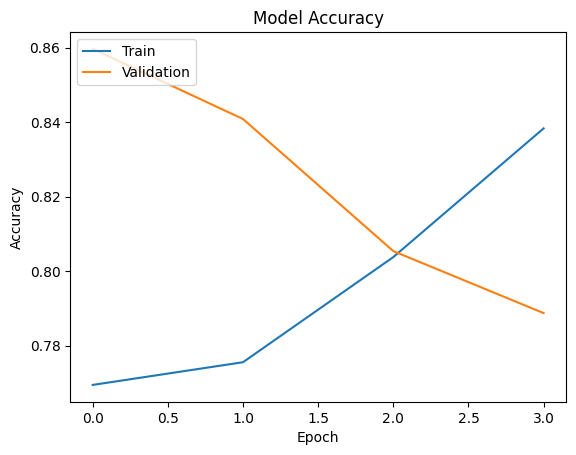

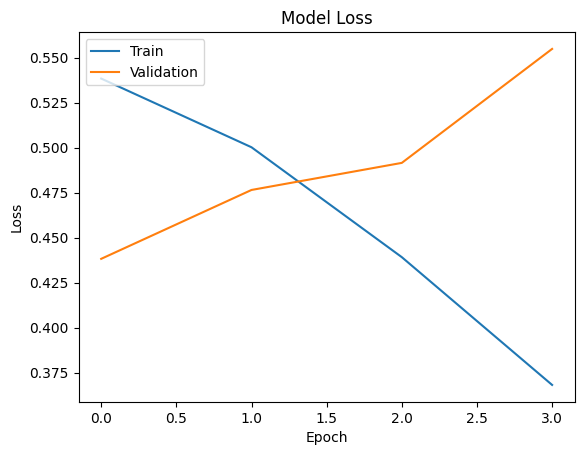

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Suddivisione del dataset in set di addestramento e test (ad esempio, 80% training, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Valutazione del modello sul set di test
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

173/173 [==============================] - 5s 28ms/step - loss: 0.3079 - accuracy: 0.8726
Test Accuracy: 0.8726
Test Loss: 0.3079


In [ ]:
from sklearn.metrics import classification_report

# Supponiamo che il tuo modello si chiami 'model' e hai già predetto le etichette sul set di test
predictions = model.predict(test_data)

# Converto le previsioni continue in etichette di classe binaria (0 o 1)
predicted_labels = (predictions > 0.5).astype('int32')

# Stampare il classification report
print(classification_report(test_labels, predicted_labels))


173/173 [==============================] - 7s 39ms/step
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4285
           1       0.88      0.50      0.64      1243

    accuracy                           0.87      5528
   macro avg       0.87      0.74      0.78      5528
weighted avg       0.87      0.87      0.86      5528

